In [2]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

Using TensorFlow backend.


In [3]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


170500096/170498071 [==============================] - 27s 0us/step


In [5]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


In [6]:
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [7]:

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [8]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [9]:

#training
batch_size = 64

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=100,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/100
781/781 [==============================] - 178s 228ms/step - loss: 1.8777 - acc: 0.4307 - val_loss: 1.3583 - val_acc: 0.5956
Epoch 2/100
781/781 [==============================] - 178s 228ms/step - loss: 1.2482 - acc: 0.5986 - val_loss: 1.3860 - val_acc: 0.6168
Epoch 3/100
781/781 [==============================] - 178s 227ms/step - loss: 1.0716 - acc: 0.6558 - val_loss: 1.0290 - val_acc: 0.6917
Epoch 4/100
781/781 [==============================] - 178s 228ms/step - loss: 0.9684 - acc: 0.6935 - val_loss: 0.8218 - val_acc: 0.7541
Epoch 5/100
781/781 [==============================] - 178s 228ms/step - loss: 0.9023 - acc: 0.7185 - val_loss: 0.8201 - val_acc: 0.7621
Epoch 6/100
781/781 [==============================] - 178s 227ms/step - loss: 0.8568 - acc: 0.7384 - val_loss: 0.7786 - val_acc: 0.7725
Epoch 7/100
781/781 [==============================] - 177s 227ms/step - loss: 0.8242 - acc: 0.7516 - val_loss: 0.7711 - val_acc: 0.7741
Epoch 8/100
781/781 [====================

781/781 [==============================] - 178s 228ms/step - loss: 0.5852 - acc: 0.8506 - val_loss: 0.6208 - val_acc: 0.8491
Epoch 61/100
781/781 [==============================] - 178s 228ms/step - loss: 0.5847 - acc: 0.8501 - val_loss: 0.5520 - val_acc: 0.8659
Epoch 62/100
781/781 [==============================] - 178s 228ms/step - loss: 0.5855 - acc: 0.8510 - val_loss: 0.6419 - val_acc: 0.8409
Epoch 63/100
781/781 [==============================] - 178s 228ms/step - loss: 0.5819 - acc: 0.8500 - val_loss: 0.6331 - val_acc: 0.8426
Epoch 64/100
781/781 [==============================] - 178s 228ms/step - loss: 0.5806 - acc: 0.8528 - val_loss: 0.6472 - val_acc: 0.8356
Epoch 65/100
781/781 [==============================] - 178s 228ms/step - loss: 0.5802 - acc: 0.8532 - val_loss: 0.6238 - val_acc: 0.8467
Epoch 66/100
781/781 [==============================] - 178s 227ms/step - loss: 0.5842 - acc: 0.8515 - val_loss: 0.6099 - val_acc: 0.8491
Epoch 67/100
781/781 [=========================

In [10]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')    

#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 13s 1ms/step

Test result: 86.030 loss: 0.547


In [13]:
top_layer = model.layers[0]
top_layer

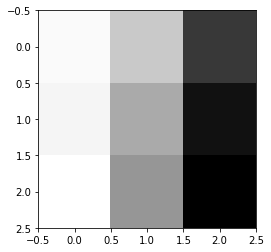

In [24]:
import matplotlib.pyplot as plt
plt.imshow(top_layer.get_weights()[0][2:, :, :, 30].squeeze(), cmap='gray')

In [42]:
history = model.history

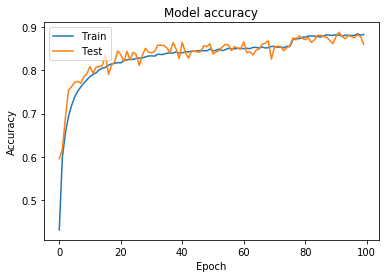

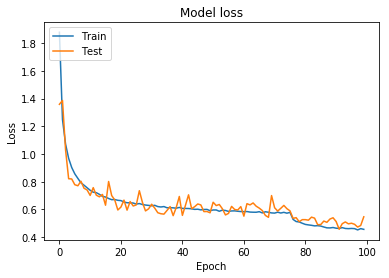

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [48]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils \
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot 